In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import itertools
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
df = pd.read_excel("Unemplyment_final.xlsx")

In [3]:
df

,Years,CA_Civilian_labor_force_0,CA_Civilian_labor_force_1,CA_Employed_0,CA_Employed_1,CA_Unemployed__0,CA_Unemployed_1,CA_Unemployment_rate_0,CA_Unemployment_rate_1,FL_Civilian_labor_force_0,...,TX_Employed_0,TX_Employed_1,TX_Unemployed__0,TX_Unemployed_1,TX_Unemployment_rate_0,TX_Unemployment_rate_1,US_Civilian_labor_force,US_Employed,US_Unemployed,US_Unemployment_rate
0,2000,781632.136364,445383.162162,743099.772727,423649.972973,38532.363636,21733.189189,6.513636,5.935135,341762.625000,...,64410.196532,106378.012195,3014.965318,4745.841463,4.995954,4.398780,142601576,136904853,5696723,4.0
1,2001,793814.954545,452133.216216,750213.227273,427468.324324,43601.727273,24664.891892,6.877273,6.451351,347327.250000,...,64942.635838,107251.121951,3438.236994,5534.243902,5.069364,4.804878,143786537,136977996,6808541,4.7
2,2002,801053.272727,455942.945946,746867.545455,425185.351351,54185.727273,30757.594595,7.718182,7.659459,347463.416667,...,65224.618497,107783.487805,4436.173410,7249.756098,6.157803,5.946341,144839298,136455783,8383515,5.8
3,2003,802236.090909,456611.027027,746826.727273,425211.972973,55409.363636,31399.054054,8.186364,7.913514,350546.333333,...,66104.358382,108744.731707,4777.520231,7825.243902,6.386705,6.408537,145660094,136944522,8715572,6.0
4,2004,806886.454545,459392.216216,756515.636364,430912.648649,50370.818182,28479.567568,7.863636,7.300000,359932.541667,...,67040.375723,110661.658537,4308.306358,7060.463415,5.788439,5.776829,146724795,138613904,8110891,5.5
5,2005,814379.863636,463770.675676,770314.136364,438928.027027,44065.727273,24842.648649,7.236364,6.470270,372741.666667,...,68350.919075,113390.890244,3969.075145,6536.548780,5.295376,5.234146,148597241,141000912,7596329,5.1
6,2006,819889.818182,467156.459459,779594.590909,444449.027027,40295.227273,22707.432432,6.718182,5.945946,384591.500000,...,69598.184971,115866.987805,3661.404624,6039.536585,4.926590,4.803659,150707773,143729350,6978423,4.6
7,2007,831285.772727,473869.405405,786736.727273,448718.810811,44549.045455,25150.594595,7.154545,6.410811,392524.250000,...,70645.381503,117789.182927,3247.381503,5365.609756,4.307514,4.269512,152191050,145156133,7034917,4.6
8,2008,843689.318182,481044.675676,782064.727273,446128.162162,61624.590909,34916.513514,9.077273,8.362162,394488.083333,...,71749.005780,119615.048780,3662.352601,6108.451220,4.575723,4.664634,153761037,144860349,8900688,5.8
9,2009,849763.954545,484245.918919,751507.090909,428461.918919,98256.863636,55784.000000,13.213636,12.662162,387427.208333,...,71323.953757,118869.548780,5836.971098,9660.378049,7.288439,7.235366,153825454,139594699,14230755,9.3


## Single Exponential smoothening


#### Texas Metro and Non-metro

In [4]:
# Split the data into train and test sets
train = df.iloc[:-3]  # 2000 to 2017
test = df.iloc[-3:]   # 2018 to 2022

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

# Single exponential smoothing
model_single = ExponentialSmoothing(train['TX_Unemployment_rate_1'])
fit_model_single = model_single.fit()

# Predictions
predictions_single = fit_model_single.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_single = mean_absolute_error(test['TX_Unemployment_rate_1'], predictions_single)

# Calculate percentage accuracy for each prediction
accuracy_single = ((1 - (abs(test['TX_Unemployment_rate_1'] - predictions_single) / test['TX_Unemployment_rate_1'])) * 100)

# Mean percentage accuracy
mean_accuracy_single = accuracy_single.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Single Exponential Smoothing):", mae_single)
print("Mean Percentage Accuracy on test set (Single Exponential Smoothing):", mean_accuracy_single, "%")


Mean Absolute Error (MAE) on test set (Single Exponential Smoothing): 2.023170726273656
Mean Percentage Accuracy on test set (Single Exponential Smoothing): 67.24551151356489 %


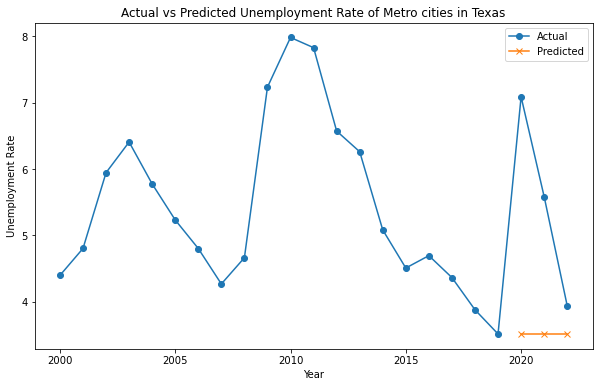

In [8]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Years'], df['TX_Unemployment_rate_1'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_single, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of Metro cities in Texas')
plt.legend()

# Displaying the plot
plt.show()


In [9]:
# Single exponential smoothing
model_single = ExponentialSmoothing(train['TX_Unemployment_rate_0'])
fit_model_single = model_single.fit()

# Predictions
predictions_single = fit_model_single.forecast(steps=len(test))

# Calculate percentage accuracy for each prediction
accuracy_single = ((1 - (abs(test['TX_Unemployment_rate_0'] - predictions_single) / test['TX_Unemployment_rate_0'])) * 100)

# Mean percentage accuracy
mean_accuracy_single = accuracy_single.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Single Exponential Smoothing):", mae_single)
print("Mean Percentage Accuracy on test set (Single Exponential Smoothing):", mean_accuracy_single, "%")


Mean Absolute Error (MAE) on test set (Single Exponential Smoothing): 2.023170726273656
Mean Percentage Accuracy on test set (Single Exponential Smoothing): 67.84802047615148 %


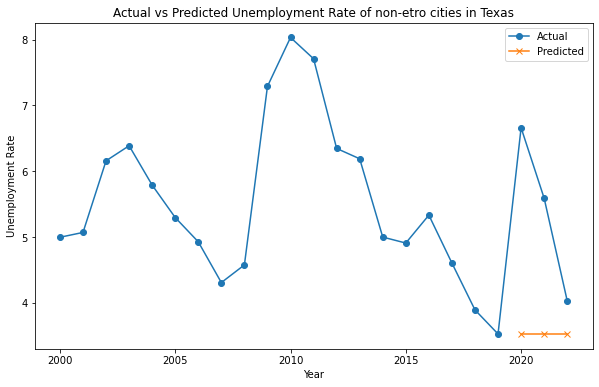

In [10]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Years'], df['TX_Unemployment_rate_0'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_single, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of non-etro cities in Texas')
plt.legend()

# Displaying the plot
plt.show()


### Michigan metro and non-metro

In [11]:
# Single exponential smoothing
model_single = ExponentialSmoothing(train['MI_Unemployment_rate_1'])
fit_model_single = model_single.fit()

# Predictions
predictions_single = fit_model_single.forecast(steps=len(test))

# Calculate percentage accuracy for each prediction
accuracy_single = ((1 - (abs(test['MI_Unemployment_rate_1'] - predictions_single) / test['MI_Unemployment_rate_1'])) * 100)

# Mean percentage accuracy
mean_accuracy_single = accuracy_single.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Single Exponential Smoothing):", mae_single)
print("Mean Percentage Accuracy on test set (Single Exponential Smoothing):", mean_accuracy_single, "%")


Mean Absolute Error (MAE) on test set (Single Exponential Smoothing): 2.023170726273656
Mean Percentage Accuracy on test set (Single Exponential Smoothing): 68.18668187250375 %


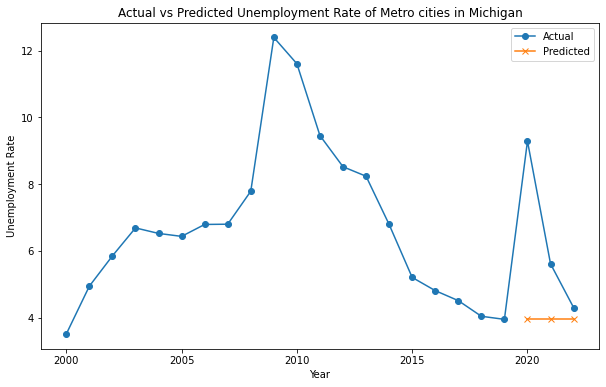

In [12]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Years'], df['MI_Unemployment_rate_1'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_single, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of Metro cities in Michigan')
plt.legend()

# Displaying the plot
plt.show()


In [13]:
# Single exponential smoothing
model_single = ExponentialSmoothing(train['MI_Unemployment_rate_0'])
fit_model_single = model_single.fit()

# Predictions
predictions_single = fit_model_single.forecast(steps=len(test))

# Calculate percentage accuracy for each prediction
accuracy_single = ((1 - (abs(test['MI_Unemployment_rate_0'] - predictions_single) / test['MI_Unemployment_rate_0'])) * 100)

# Mean percentage accuracy
mean_accuracy_single = accuracy_single.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Single Exponential Smoothing):", mae_single)
print("Mean Percentage Accuracy on test set (Single Exponential Smoothing):", mean_accuracy_single, "%")


Mean Absolute Error (MAE) on test set (Single Exponential Smoothing): 2.023170726273656
Mean Percentage Accuracy on test set (Single Exponential Smoothing): 77.80864698578289 %


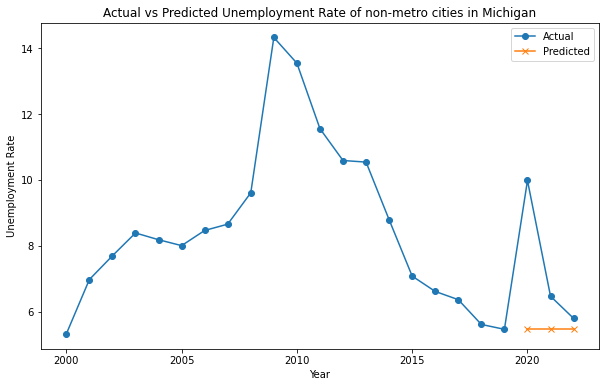

In [14]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Years'], df['MI_Unemployment_rate_0'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_single, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of non-metro cities in Michigan')
plt.legend()

# Displaying the plot
plt.show()


## Double Exponential Smoothing

#### Texas metro and non-metro

In [15]:
# Double exponential smoothing
model_double = ExponentialSmoothing(train['TX_Unemployment_rate_1'], trend='add')
fit_model_double = model_double.fit()

# Predictions
predictions_double = fit_model_double.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_double = mean_absolute_error(test['TX_Unemployment_rate_1'], predictions_double)

# Calculate percentage accuracy for each prediction
accuracy_double = ((1 - (abs(test['TX_Unemployment_rate_1'] - predictions_double) / test['TX_Unemployment_rate_1'])) * 100)

# Mean percentage accuracy
mean_accuracy_double = accuracy_double.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Double Exponential Smoothing):", mae_double)
print("Mean Percentage Accuracy on test set (Double Exponential Smoothing):", mean_accuracy_double, "%")

Mean Absolute Error (MAE) on test set (Double Exponential Smoothing): 2.116107779879132
Mean Percentage Accuracy on test set (Double Exponential Smoothing): 65.29343672114992 %


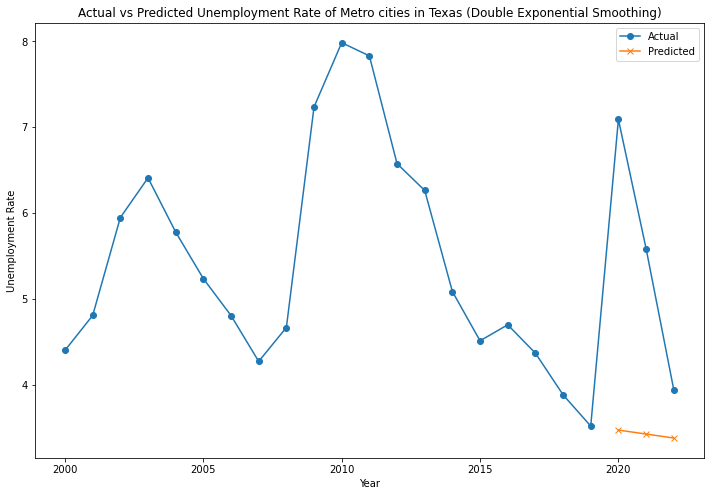

In [16]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plotting the actual values
plt.plot(df['Years'], df['TX_Unemployment_rate_1'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_double, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of Metro cities in Texas (Double Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()


In [17]:
# Double exponential smoothing
model_double = ExponentialSmoothing(train['TX_Unemployment_rate_0'], trend='add')
fit_model_double = model_double.fit()

# Predictions
predictions_double = fit_model_double.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_double = mean_absolute_error(test['TX_Unemployment_rate_0'], predictions_double)

# Calculate percentage accuracy for each prediction
accuracy_double = ((1 - (abs(test['TX_Unemployment_rate_0'] - predictions_double) / test['TX_Unemployment_rate_0'])) * 100)

# Mean percentage accuracy
mean_accuracy_double = accuracy_double.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Double Exponential Smoothing):", mae_double)
print("Mean Percentage Accuracy on test set (Double Exponential Smoothing):", mean_accuracy_double, "%")

Mean Absolute Error (MAE) on test set (Double Exponential Smoothing): 2.05466695475651
Mean Percentage Accuracy on test set (Double Exponential Smoothing): 64.6198847834717 %


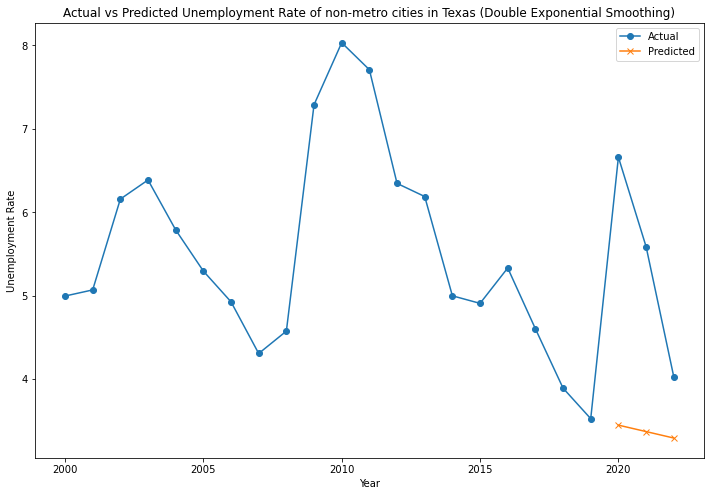

In [18]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plotting the actual values
plt.plot(df['Years'], df['TX_Unemployment_rate_0'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_double, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of non-metro cities in Texas (Double Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()


#### Michigan metro and non-metro

In [19]:
# Double exponential smoothing
model_double = ExponentialSmoothing(train['MI_Unemployment_rate_1'], trend='add')
fit_model_double = model_double.fit()

# Predictions
predictions_double = fit_model_double.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_double = mean_absolute_error(test['MI_Unemployment_rate_1'], predictions_double)

# Calculate percentage accuracy for each prediction
accuracy_double = ((1 - (abs(test['MI_Unemployment_rate_1'] - predictions_double) / test['MI_Unemployment_rate_1'])) * 100)

# Mean percentage accuracy
mean_accuracy_double = accuracy_double.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Double Exponential Smoothing):", mae_double)
print("Mean Percentage Accuracy on test set (Double Exponential Smoothing):", mean_accuracy_double, "%")

Mean Absolute Error (MAE) on test set (Double Exponential Smoothing): 3.010875676610766
Mean Percentage Accuracy on test set (Double Exponential Smoothing): 57.426495569021306 %


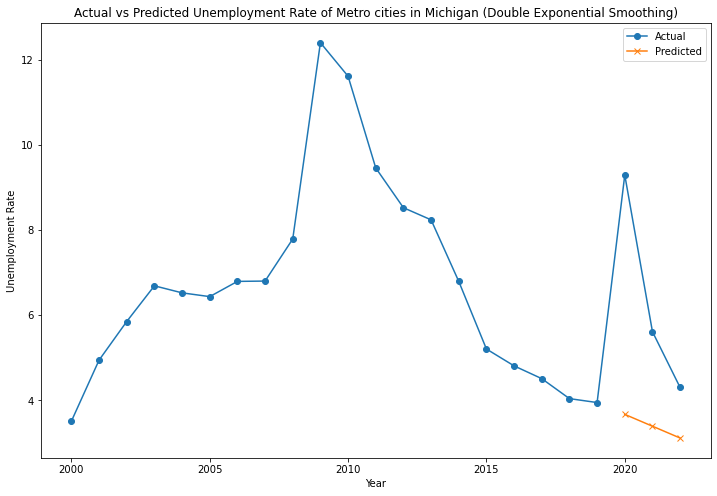

In [20]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plotting the actual values
plt.plot(df['Years'], df['MI_Unemployment_rate_1'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_double, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of Metro cities in Michigan (Double Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()


In [21]:
# Double exponential smoothing
model_double = ExponentialSmoothing(train['MI_Unemployment_rate_0'], trend='add')
fit_model_double = model_double.fit()

# Predictions
predictions_double = fit_model_double.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_double = mean_absolute_error(test['MI_Unemployment_rate_0'], predictions_double)

# Calculate percentage accuracy for each prediction
accuracy_double = ((1 - (abs(test['MI_Unemployment_rate_0'] - predictions_double) / test['MI_Unemployment_rate_0'])) * 100)

# Mean percentage accuracy
mean_accuracy_double = accuracy_double.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Double Exponential Smoothing):", mae_double)
print("Mean Percentage Accuracy on test set (Double Exponential Smoothing):", mean_accuracy_double, "%")

Mean Absolute Error (MAE) on test set (Double Exponential Smoothing): 2.715155801919849
Mean Percentage Accuracy on test set (Double Exponential Smoothing): 66.01744929785617 %


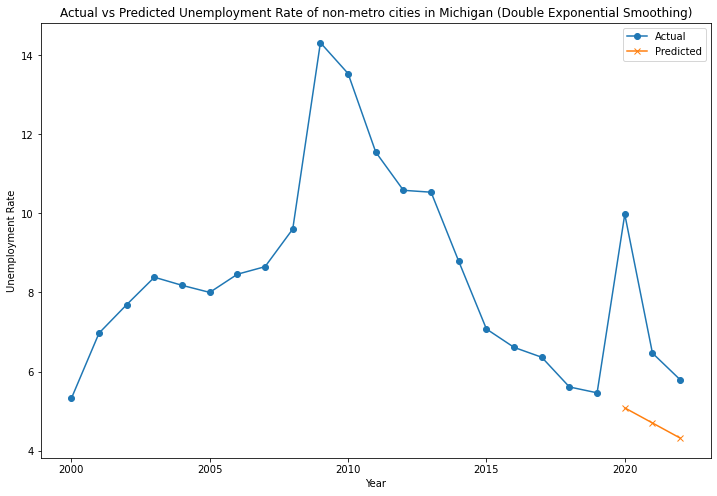

In [22]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plotting the actual values
plt.plot(df['Years'], df['MI_Unemployment_rate_0'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_double, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of non-metro cities in Michigan (Double Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()


## Triple Exponential Smoothing

#### Texas metro and non-metro

In [23]:
# Triple exponential smoothing
model_triple = ExponentialSmoothing(train['TX_Unemployment_rate_1'], trend='add', seasonal='add', seasonal_periods=4)
fit_model_triple = model_triple.fit()

# Predictions
predictions_triple = fit_model_triple.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_triple = mean_absolute_error(test['TX_Unemployment_rate_1'], predictions_triple)

# Calculate percentage accuracy for each prediction
accuracy_triple = ((1 - (abs(test['TX_Unemployment_rate_1'] - predictions_triple) / test['TX_Unemployment_rate_1'])) * 100)

# Mean percentage accuracy
mean_accuracy_triple = accuracy_triple.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing):", mae_triple)
print("Mean Percentage Accuracy on test set (Triple Exponential Smoothing):", mean_accuracy_triple, "%")

Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing): 2.424821748910127
Mean Percentage Accuracy on test set (Triple Exponential Smoothing): 59.52990688749836 %


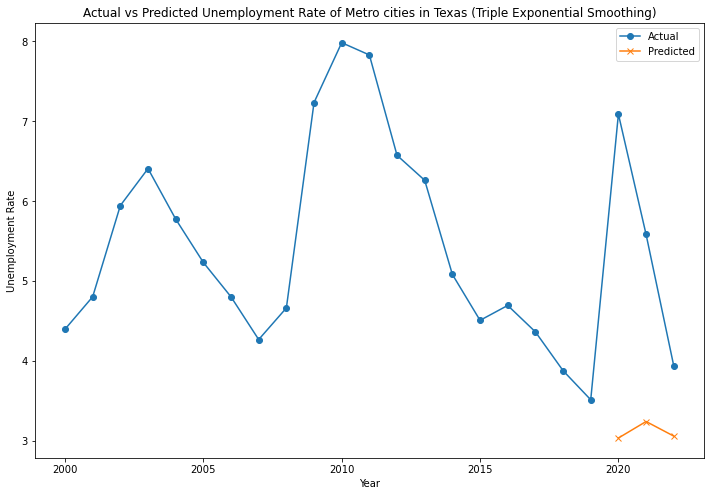

In [24]:
# Increase the figure size
plt.figure(figsize=(12, 8))

# Plotting the actual values
plt.plot(df['Years'], df['TX_Unemployment_rate_1'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_triple, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of Metro cities in Texas (Triple Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

<div style="background-color:cream; color:blue; padding:10px; font-weight:bold;">
Predictions on Texas Metro.
</div>


In [25]:
# Predict next 4 years
future_predictions = fit_model_triple.forecast(steps=4)

# Display predictions
print("Predictions for the next 4 years:")
print(future_predictions)


Predictions for the next 4 years:
20    3.037168
21    3.243890
22    3.061550
23    2.696916
dtype: float64


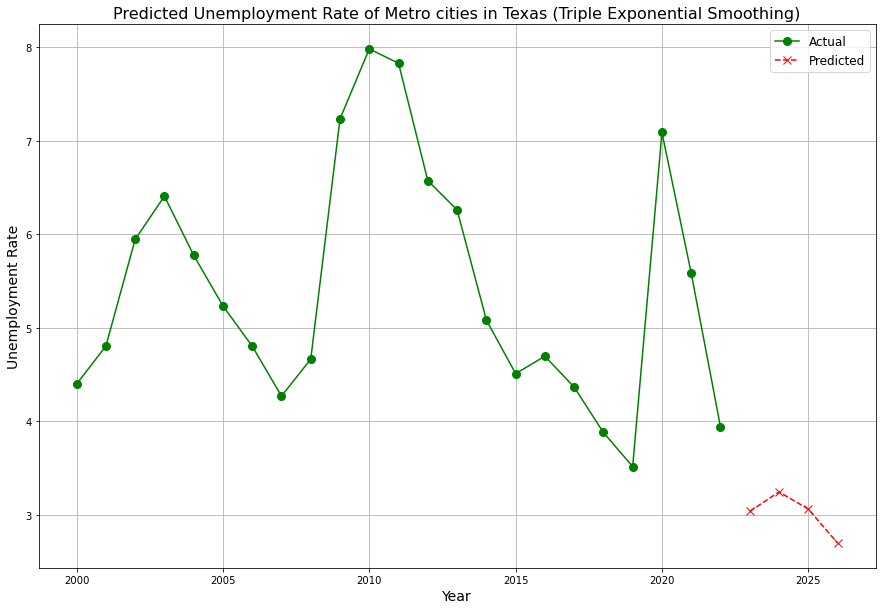

In [26]:
# Plotting the actual values
plt.figure(figsize=(15, 10))
plt.plot(df['Years'], df['TX_Unemployment_rate_1'], label='Actual', color='green', marker='o', markersize=8, linestyle='-')

# Plotting the predicted values for the next 4 years
future_years = df['Years'].iloc[-1] + 1 + range(4)  # Generate years for the next 4 years
plt.plot(future_years, future_predictions, label='Predicted', color='red', marker='x', markersize=8, linestyle='--')

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.title('Predicted Unemployment Rate of Metro cities in Texas (Triple Exponential Smoothing)', fontsize=16)
plt.legend(fontsize=12)

# Adding grid
plt.grid(True)

# Displaying the plot
plt.show()

In [27]:
# Triple exponential smoothing
model_triple = ExponentialSmoothing(train['TX_Unemployment_rate_0'], trend='add', seasonal='add', seasonal_periods=4)
fit_model_triple = model_triple.fit()

# Predictions
predictions_triple = fit_model_triple.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_triple = mean_absolute_error(test['TX_Unemployment_rate_0'], predictions_triple)

# Calculate percentage accuracy for each prediction
accuracy_triple = ((1 - (abs(test['TX_Unemployment_rate_0'] - predictions_triple) / test['TX_Unemployment_rate_0'])) * 100)

# Mean percentage accuracy
mean_accuracy_triple = accuracy_triple.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing):", mae_triple)
print("Mean Percentage Accuracy on test set (Triple Exponential Smoothing):", mean_accuracy_triple, "%")

Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing): 2.05855217057587
Mean Percentage Accuracy on test set (Triple Exponential Smoothing): 65.03133099181657 %


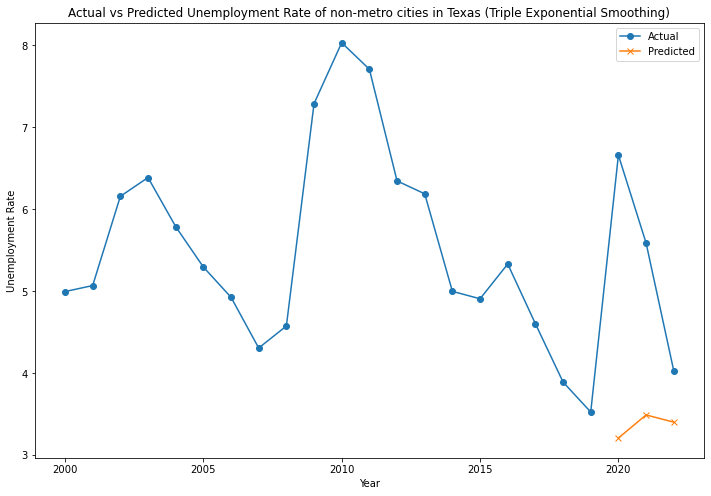

In [28]:
# Increase the figure size
plt.figure(figsize=(12, 8))

# Plotting the actual values
plt.plot(df['Years'], df['TX_Unemployment_rate_0'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_triple, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of non-metro cities in Texas (Triple Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

<div style="background-color:cream; color:blue; padding:10px; font-weight:bold;">
Predictions on Texas Non-metro.
</div>


In [29]:
# Predict next 4 years
future_predictions = fit_model_triple.forecast(steps=4)

# Display predictions
print("Predictions for the next 4 years:")
print(future_predictions)


Predictions for the next 4 years:
20    3.209577
21    3.491065
22    3.403470
23    3.169328
dtype: float64


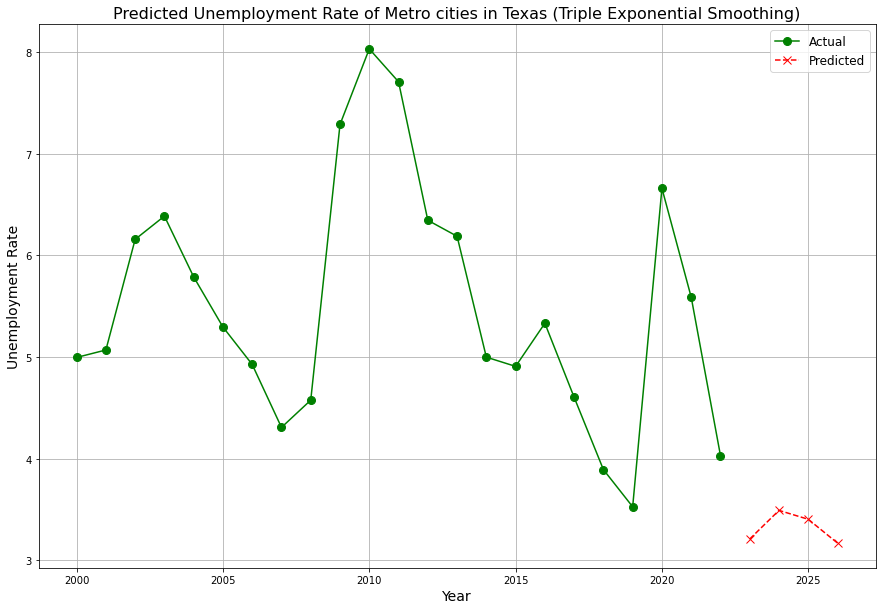

In [30]:
# Plotting the actual values
plt.figure(figsize=(15, 10))
plt.plot(df['Years'], df['TX_Unemployment_rate_0'], label='Actual', color='green', marker='o', markersize=8, linestyle='-')

# Plotting the predicted values for the next 4 years
future_years = df['Years'].iloc[-1] + 1 + range(4)  # Generate years for the next 4 years
plt.plot(future_years, future_predictions, label='Predicted', color='red', marker='x', markersize=8, linestyle='--')

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.title('Predicted Unemployment Rate of Metro cities in Texas (Triple Exponential Smoothing)', fontsize=16)
plt.legend(fontsize=12)

# Adding grid
plt.grid(True)

# Displaying the plot
plt.show()

### Michigan metro and non-metro

In [31]:
# Triple exponential smoothing
model_triple = ExponentialSmoothing(train['MI_Unemployment_rate_1'], trend='add', seasonal='add', seasonal_periods=4)
fit_model_triple = model_triple.fit()

# Predictions
predictions_triple = fit_model_triple.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_triple = mean_absolute_error(test['MI_Unemployment_rate_1'], predictions_triple)

# Calculate percentage accuracy for each prediction
accuracy_triple = ((1 - (abs(test['MI_Unemployment_rate_1'] - predictions_triple) / test['MI_Unemployment_rate_1'])) * 100)

# Mean percentage accuracy
mean_accuracy_triple = accuracy_triple.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing):", mae_triple)
print("Mean Percentage Accuracy on test set (Triple Exponential Smoothing):", mean_accuracy_triple, "%")

Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing): 2.663954188698655
Mean Percentage Accuracy on test set (Triple Exponential Smoothing): 64.8110803299958 %


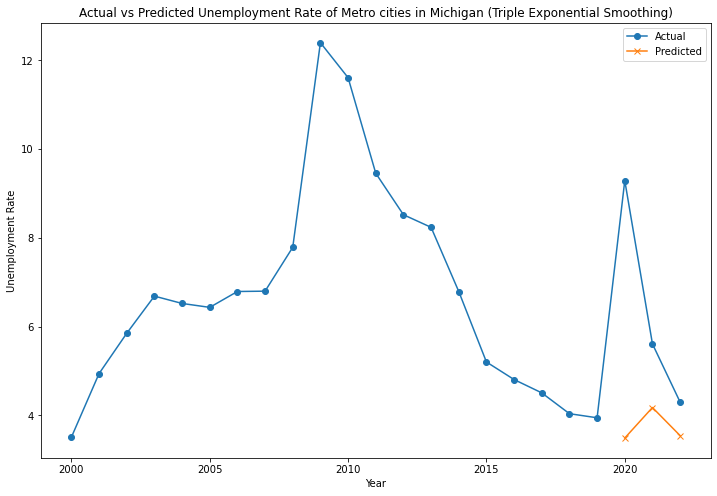

In [32]:
# Increase the figure size
plt.figure(figsize=(12, 8))

# Plotting the actual values
plt.plot(df['Years'], df['MI_Unemployment_rate_1'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_triple, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of Metro cities in Michigan (Triple Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

<div style="background-color:cream; color:blue; padding:10px; font-weight:bold;">
Predictions on Michigan Metro.
</div>


In [33]:
# Predict next 4 years
future_predictions = fit_model_triple.forecast(steps=4)

# Display predictions
print("Predictions for the next 4 years:")
print(future_predictions)


Predictions for the next 4 years:
20    3.489840
21    4.177753
22    3.544390
23    2.642127
dtype: float64


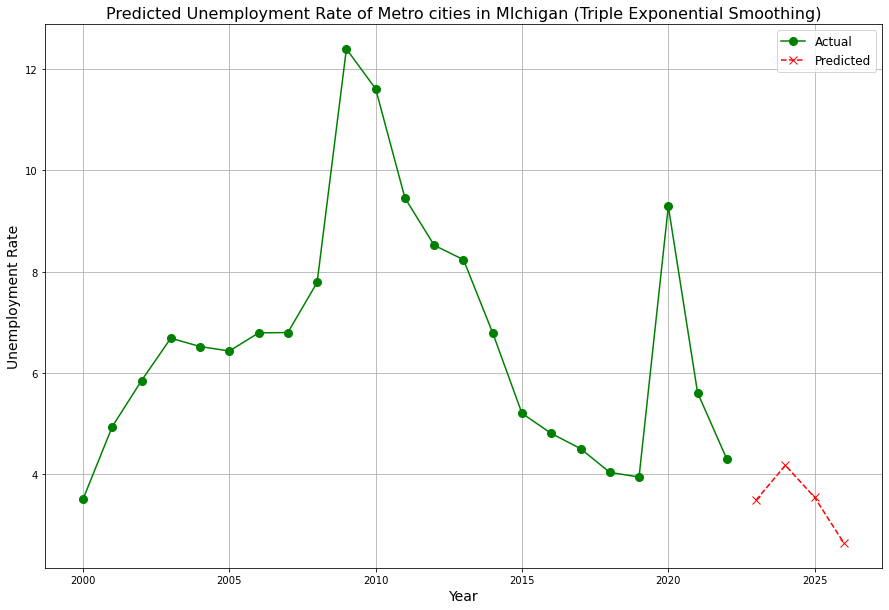

In [34]:
# Plotting the actual values
plt.figure(figsize=(15, 10))
plt.plot(df['Years'], df['MI_Unemployment_rate_1'], label='Actual', color='green', marker='o', markersize=8, linestyle='-')

# Plotting the predicted values for the next 4 years
future_years = df['Years'].iloc[-1] + 1 + range(4)  # Generate years for the next 4 years
plt.plot(future_years, future_predictions, label='Predicted', color='red', marker='x', markersize=8, linestyle='--')

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.title('Predicted Unemployment Rate of Metro cities in MIchigan (Triple Exponential Smoothing)', fontsize=16)
plt.legend(fontsize=12)

# Adding grid
plt.grid(True)

# Displaying the plot
plt.show()

In [35]:
# Triple exponential smoothing
model_triple = ExponentialSmoothing(train['MI_Unemployment_rate_0'], trend='add', seasonal='add', seasonal_periods=4)
fit_model_triple = model_triple.fit()

# Predictions
predictions_triple = fit_model_triple.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE)
mae_triple = mean_absolute_error(test['MI_Unemployment_rate_0'], predictions_triple)

# Calculate percentage accuracy for each prediction
accuracy_triple = ((1 - (abs(test['MI_Unemployment_rate_0'] - predictions_triple) / test['MI_Unemployment_rate_0'])) * 100)

# Mean percentage accuracy
mean_accuracy_triple = accuracy_triple.mean()

# Results
print("Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing):", mae_triple)
print("Mean Percentage Accuracy on test set (Triple Exponential Smoothing):", mean_accuracy_triple, "%")

Mean Absolute Error (MAE) on test set (Triple Exponential Smoothing): 2.3099494565645267
Mean Percentage Accuracy on test set (Triple Exponential Smoothing): 72.89741781812492 %


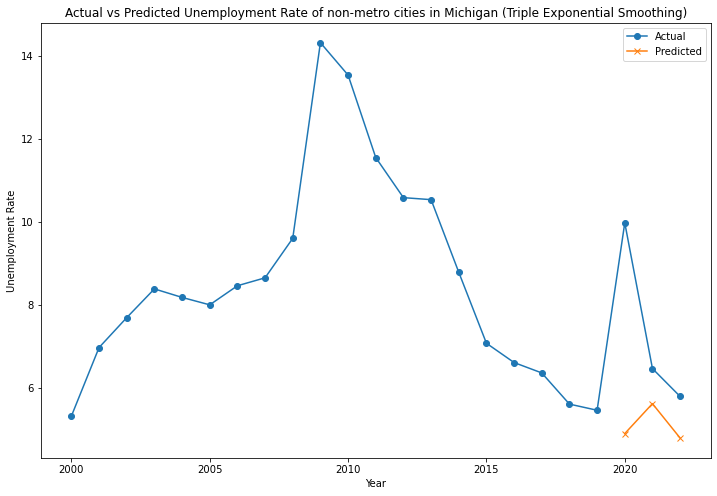

In [36]:
# Increase the figure size
plt.figure(figsize=(12, 8))

# Plotting the actual values
plt.plot(df['Years'], df['MI_Unemployment_rate_0'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test['Years'], predictions_triple, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of non-metro cities in Michigan (Triple Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.show()

<div style="background-color:cream; color:blue; padding:10px; font-weight:bold;">
Predictions on Michigan Non-Metro.
</div>


In [37]:
# Predict next 4 years
future_predictions = fit_model_triple.forecast(steps=4)

# Display predictions
print("Predictions for the next 4 years:")
print(future_predictions)


Predictions for the next 4 years:
20    4.897789
21    5.619690
22    4.790604
23    3.837070
dtype: float64


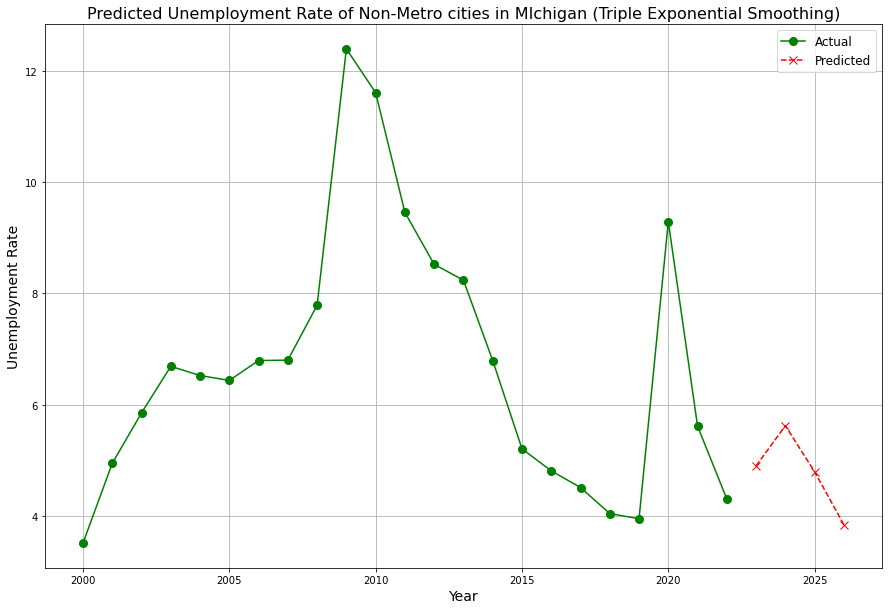

In [38]:
# Plotting the actual values
plt.figure(figsize=(15, 10))
plt.plot(df['Years'], df['MI_Unemployment_rate_1'], label='Actual', color='green', marker='o', markersize=8, linestyle='-')

# Plotting the predicted values for the next 4 years
future_years = df['Years'].iloc[-1] + 1 + range(4)  # Generate years for the next 4 years
plt.plot(future_years, future_predictions, label='Predicted', color='red', marker='x', markersize=8, linestyle='--')

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.title('Predicted Unemployment Rate of Non-Metro cities in MIchigan (Triple Exponential Smoothing)', fontsize=16)
plt.legend(fontsize=12)

# Adding grid
plt.grid(True)

# Displaying the plot
plt.show()

## Predictions

In [39]:
# Predict next 4 years
future_predictions = fit_model_triple.forecast(steps=4)

# Display predictions
print("Predictions for the next 4 years:")
print(future_predictions)


Predictions for the next 4 years:
20    4.897789
21    5.619690
22    4.790604
23    3.837070
dtype: float64


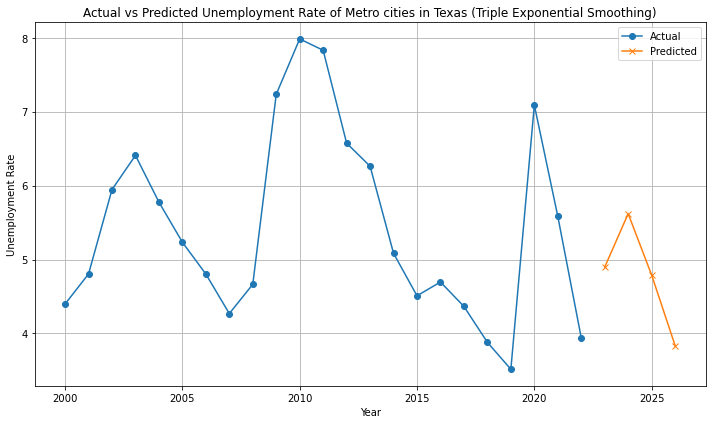

In [40]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df['Years'], df['TX_Unemployment_rate_1'], label='Actual', marker='o')

# Plotting the predicted values for the next 4 years
future_years = df['Years'].iloc[-1] + 1 + range(4)  # Generate years for the next 4 years
plt.plot(future_years, future_predictions, label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate of Metro cities in Texas (Triple Exponential Smoothing)')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()


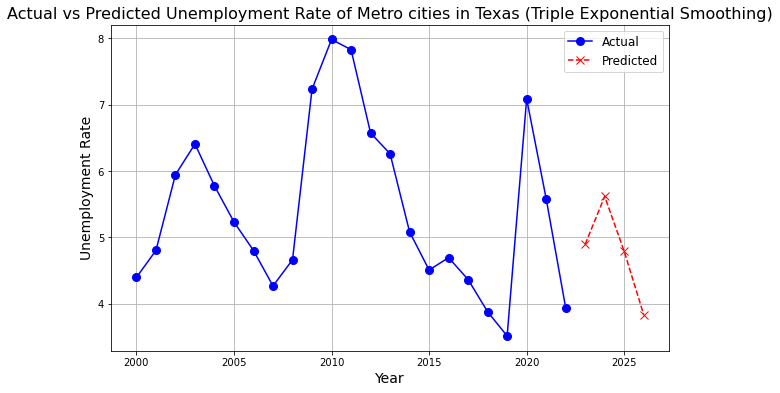

In [41]:
# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(df['Years'], df['TX_Unemployment_rate_1'], label='Actual', color='blue', marker='o', markersize=8, linestyle='-')

# Plotting the predicted values for the next 4 years
future_years = df['Years'].iloc[-1] + 1 + range(4)  # Generate years for the next 4 years
plt.plot(future_years, future_predictions, label='Predicted', color='red', marker='x', markersize=8, linestyle='--')

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.title('Actual vs Predicted Unemployment Rate of Metro cities in Texas (Triple Exponential Smoothing)', fontsize=16)
plt.legend(fontsize=12)

# Adding grid
plt.grid(True)

# Displaying the plot
plt.show()